# Part 1 - Requirements & Download Data

### Import Libraries

In [335]:
import talib
import quandl

In [336]:
import matplotlib.pyplot as plt
import mplfinance as mpf
%matplotlib inline

In [337]:
import numpy as np
import pandas as pd

### Download Financial Data

In [338]:
data = quandl.get("WIKI/NVDA")

In [339]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [340]:
data.head(3)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1999-01-22,21.00,23.44,18.63,19.69,5655600.0,0.0,1.0,1.623824,1.812497,1.440564,1.522529,67867200.0
1999-01-25,21.25,22.00,19.69,21.75,1063500.0,0.0,1.0,1.643156,1.701149,1.522529,1.681818,12762000.0
1999-01-26,22.00,22.44,19.75,20.06,715000.0,0.0,1.0,1.701149,1.735172,1.527168,1.551139,8580000.0


In [341]:
data.tail(3)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-23,242.40,242.67,232.520,232.97,18225390.0,0.0,1.0,242.40,242.67,232.520,232.97,18225390.0
2018-03-26,238.00,244.53,235.900,244.48,15130542.0,0.0,1.0,238.00,244.53,235.900,244.48,15130542.0
2018-03-27,247.75,250.00,219.845,225.52,34462113.0,0.0,1.0,247.75,250.00,219.845,225.52,34462113.0


# Part 2 - Visualization

C:\Users\Rosie\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


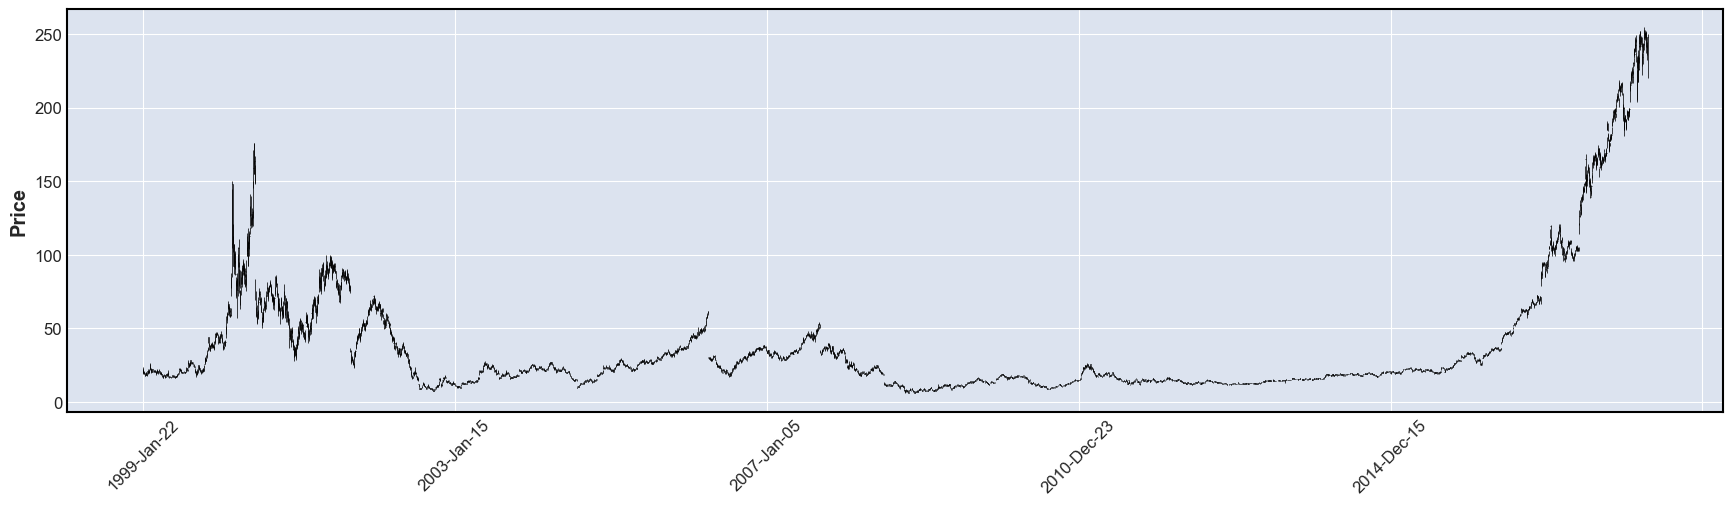

In [342]:
mpf.plot(data, figratio=(16,4))

### Slice to reduce amount of data

In [343]:
sample0 = data.loc['2017-09-01':]

In [344]:
sample0.tail(3)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-23,242.40,242.67,232.520,232.97,18225390.0,0.0,1.0,242.40,242.67,232.520,232.97,18225390.0
2018-03-26,238.00,244.53,235.900,244.48,15130542.0,0.0,1.0,238.00,244.53,235.900,244.48,15130542.0
2018-03-27,247.75,250.00,219.845,225.52,34462113.0,0.0,1.0,247.75,250.00,219.845,225.52,34462113.0


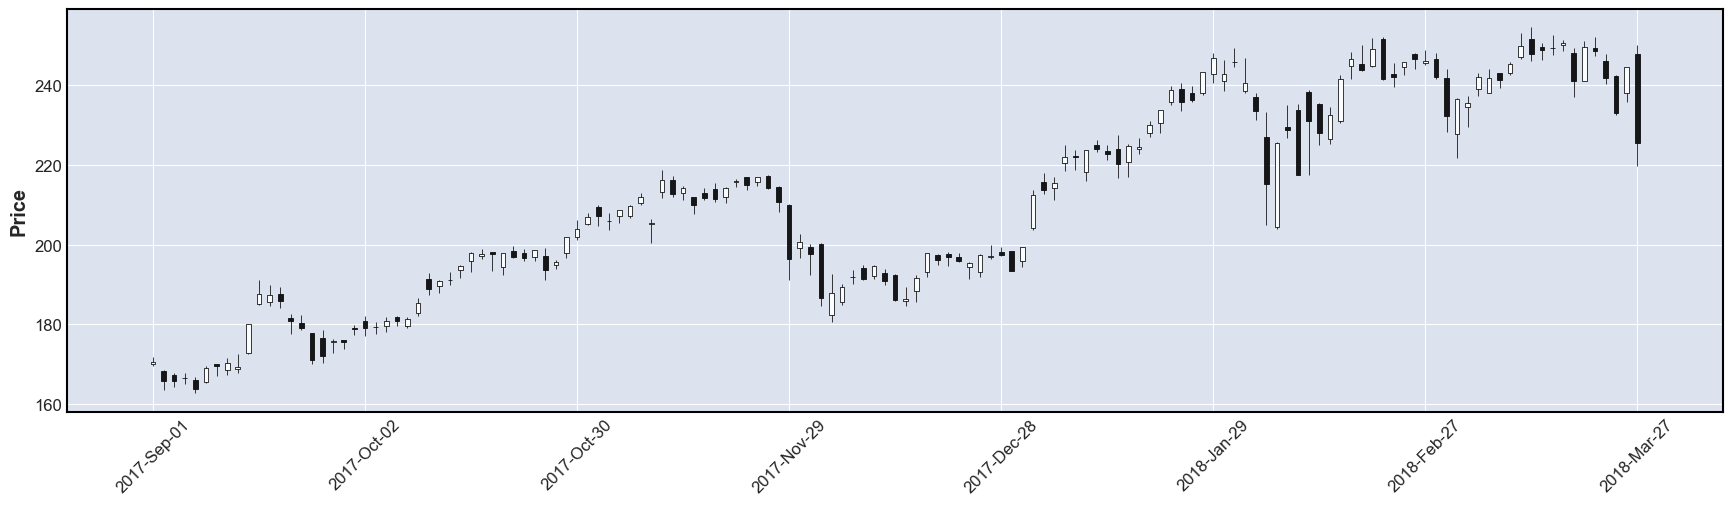

In [345]:
mpf.plot(sample0, type='candle', figratio=(16,4))

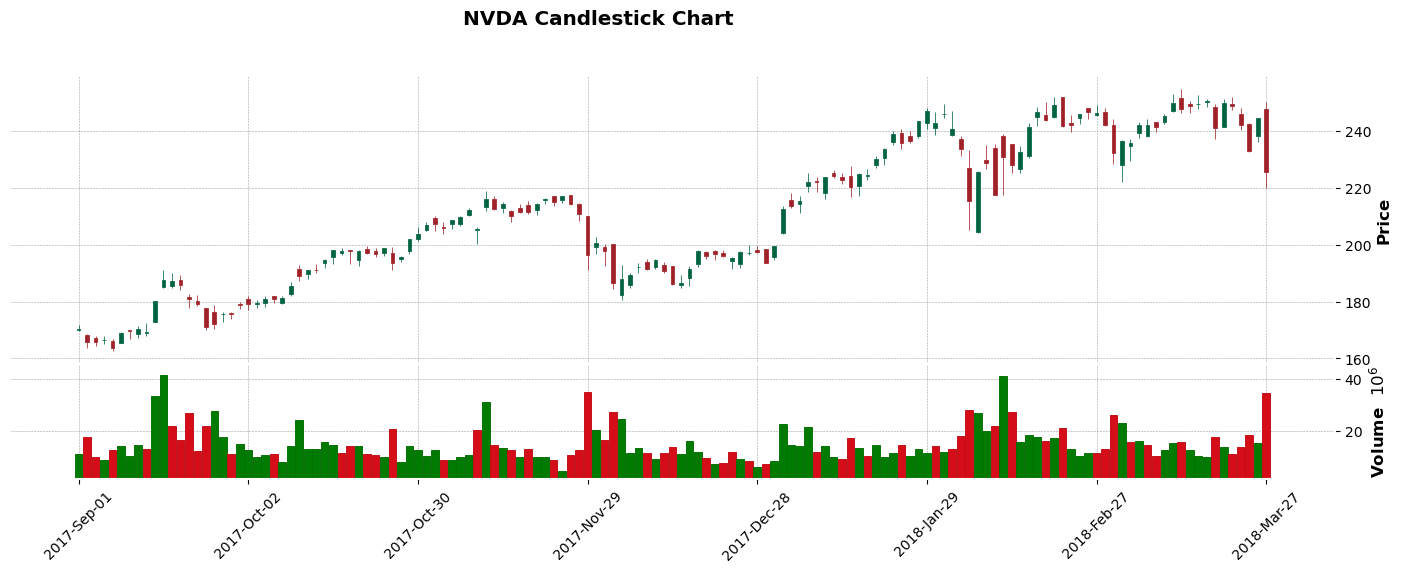

In [346]:
mpf.plot(sample0, type='candle', figratio=(16,5), style='charles', volume=True, title='NVDA Candlestick Chart')

# Part 3 - Candlestick Pattern Recognition

### Make a copy of data and customize it

In [347]:
df = data.copy()
df.drop(axis=1, columns=["Open","High","Low","Close","Volume", "Ex-Dividend", "Split Ratio"], inplace=True)
df.rename(columns={"Adj. Open":"open", "Adj. High":"high", "Adj. Low":"low", "Adj. Close":"close", "Adj. Volume":"volume"},inplace=True)

In [348]:
df.head(3)

,open,high,low,close,volume
Date,,,,,
1999-01-22,1.623824,1.812497,1.440564,1.522529,67867200.0
1999-01-25,1.643156,1.701149,1.522529,1.681818,12762000.0
1999-01-26,1.701149,1.735172,1.527168,1.551139,8580000.0


### Use TA-Lib Library to Recognize Candlestick Patterns

In [349]:
egf_df = talib.CDLENGULFING(df['open'], df['high'], df['low'], df['close'])

### Display the Results of Candlestick Patterns 

In [350]:
print("Total trading days: {}".format(df["open"].count()))
print("Engulfing Candles appeared: {} times".format(egf_df[egf_df!=0].count()))  

Total trading days: 4825
Engulfing Candles appeared: 377 times


### Store the results in the copied dataframe 

In [351]:
df['engulfing'] = egf_df

# Part 4 - Candlestick Pattern Marking on Chart

### Store the markers of candlestick patterns

In [352]:
df['marker_bull_egf'] = df[df['engulfing'] == 100]['low'] - 3
df['marker_bear_egf'] = df[df['engulfing'] == -100]['high'] + 3

In [353]:
df[df['engulfing'] != 0]

,open,high,low,close,volume,engulfing,marker_bull_egf,marker_bear_egf
Date,,,,,,,,
1999-01-26,1.701149,1.735172,1.527168,1.551139,8580000.0,-100,NaN,4.735172
1999-02-08,1.541860,1.546499,1.479227,1.479227,3852000.0,-100,NaN,4.546499
1999-02-19,1.546499,1.643156,1.527168,1.614545,1884000.0,100,-1.472832,NaN
1999-03-16,1.653208,1.672539,1.575883,1.589801,1978800.0,-100,NaN,4.672539
1999-03-22,1.657847,1.662487,1.575883,1.575883,916800.0,-100,NaN,4.662487
...,...,...,...,...,...,...,...,...
2018-01-10,218.200000,223.820000,216.000000,223.680000,14087612.0,100,213.000000,NaN
2018-01-24,239.040000,240.493600,233.550000,235.800000,14406492.0,-100,NaN,243.493600
2018-02-21,251.690000,251.967500,241.360000,241.510000,21021844.0,-100,NaN,254.967500


### Slice the data

In [354]:
sample = df.loc['2017-11-01':'2018-03-27']
sample[sample['engulfing'] != 0]

,open,high,low,close,volume,engulfing,marker_bull_egf,marker_bear_egf
Date,,,,,,,,
2017-11-22,217.00,217.0000,213.610,214.93,8766814.0,-100,NaN,220.0000
2017-11-27,217.31,217.3600,214.010,214.14,10477983.0,-100,NaN,220.3600
2017-12-08,194.01,194.7800,191.150,191.49,11483868.0,-100,NaN,197.7800
2018-01-10,218.20,223.8200,216.000,223.68,14087612.0,100,213.0,NaN
2018-01-24,239.04,240.4936,233.550,235.80,14406492.0,-100,NaN,243.4936
2018-02-21,251.69,251.9675,241.360,241.51,21021844.0,-100,NaN,254.9675
2018-02-28,246.50,248.1000,241.530,242.00,12950470.0,-100,NaN,251.1000
2018-03-27,247.75,250.0000,219.845,225.52,34462113.0,-100,NaN,253.0000


### Plot the markers on the chart

mplfinance addplot() function: https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb

The Main, Upper panel is Panel 0 and the Lower panel is Panel 1.
mplfinance subplots using the "Panels Method": https://github.com/matplotlib/mplfinance/blob/master/examples/panels.ipynb

matplotlib markers: https://matplotlib.org/stable/api/markers_api.html

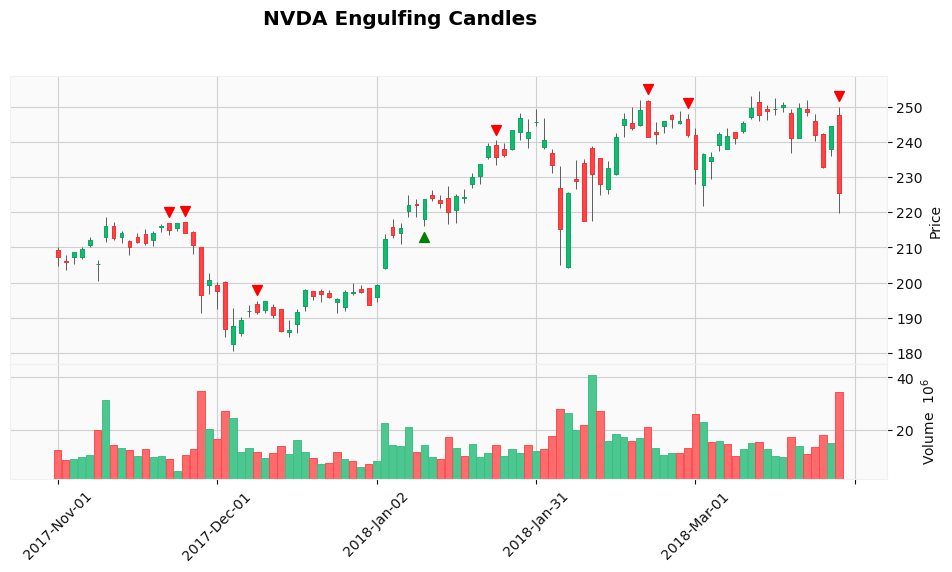

In [355]:
ap_bull_egf = mpf.make_addplot(sample['marker_bull_egf'], type='scatter', marker='^', markersize=50, color='green', panel=0)
ap_bear_egf = mpf.make_addplot(sample['marker_bear_egf'], type='scatter', marker='v', markersize=50, color='red', panel=0)
ap0 = [ap_bull_egf, ap_bear_egf]

mpf.plot(sample, type='candle', figratio=(36,17), style='yahoo', volume=True, title='NVDA Engulfing Candles', addplot=ap0)

# Part 5 - Statistics

### Calculate simple returns after candlestick pattern 

In [356]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'engulfing',
       'marker_bull_egf', 'marker_bear_egf'],
      dtype='object')

In [357]:
df.tail(3)

,open,high,low,close,volume,engulfing,marker_bull_egf,marker_bear_egf
Date,,,,,,,,
2018-03-23,242.40,242.67,232.520,232.97,18225390.0,0,NaN,NaN
2018-03-26,238.00,244.53,235.900,244.48,15130542.0,0,NaN,NaN
2018-03-27,247.75,250.00,219.845,225.52,34462113.0,-100,NaN,253.0


In [358]:
#         row selector,             column selector
egf = df.loc[:, ['close', 'volume', 'engulfing', 'marker_bull_egf', 'marker_bear_egf']]
egf.head(3)

,close,volume,engulfing,marker_bull_egf,marker_bear_egf
Date,,,,,
1999-01-22,1.522529,67867200.0,0,NaN,NaN
1999-01-25,1.681818,12762000.0,0,NaN,NaN
1999-01-26,1.551139,8580000.0,-100,NaN,4.735172


In [359]:
egf.tail(3)

,close,volume,engulfing,marker_bull_egf,marker_bear_egf
Date,,,,,
2018-03-23,232.97,18225390.0,0,NaN,NaN
2018-03-26,244.48,15130542.0,0,NaN,NaN
2018-03-27,225.52,34462113.0,-100,NaN,253.0


### Calculate simple returns in 1 to 5 days when engulfing candle appearred

In [360]:
egf['rtn'] = egf['close'] / egf['close'].shift(1) - 1

In [361]:
for i in range(1,6):
    col_name = str('rtn_aft_{}d'.format(i))
    egf[col_name] = egf['close'].shift(-i) / egf['close'] - 1

In [367]:
egf.head(6)

,close,volume,engulfing,marker_bull_egf,marker_bear_egf,rtn,rtn_aft_1d,rtn_aft_2d,rtn_aft_3d,rtn_aft_4d,rtn_aft_5d
Date,,,,,,,,,,,
1999-01-22,1.522529,67867200.0,0,NaN,NaN,NaN,0.104622,0.018791,0.015744,0.012697,-0.035043
1999-01-25,1.681818,12762000.0,0,NaN,NaN,0.104622,-0.077701,-0.080460,-0.083218,-0.126437,-0.108966
1999-01-26,1.551139,8580000.0,-100,NaN,4.735172,-0.077701,-0.002991,-0.005982,-0.052841,-0.033898,-0.108674
1999-01-27,1.546499,6109200.0,0,NaN,NaN,-0.002991,-0.003000,-0.050000,-0.031000,-0.106000,-0.087500
1999-01-28,1.541860,5688000.0,0,NaN,NaN,-0.003000,-0.047141,-0.028084,-0.103310,-0.084754,-0.034604
1999-01-29,1.469174,6100800.0,0,NaN,NaN,-0.047141,0.020000,-0.058947,-0.039474,0.013158,0.042632


In [363]:
egf.tail(6)

,close,volume,engulfing,marker_bull_egf,marker_bear_egf,rtn,rtn_aft_1d,rtn_aft_2d,rtn_aft_3d,rtn_aft_4d,rtn_aft_5d
Date,,,,,,,,,,,
2018-03-20,249.58,13725505.0,0,NaN,NaN,0.035602,-0.004087,-0.030972,-0.066552,-0.020434,-0.096402
2018-03-21,248.56,10841782.0,0,NaN,NaN,-0.004087,-0.026995,-0.062721,-0.016415,-0.092694,NaN
2018-03-22,241.85,13663927.0,0,NaN,NaN,-0.026995,-0.036717,0.010875,-0.067521,NaN,NaN
2018-03-23,232.97,18225390.0,0,NaN,NaN,-0.036717,0.049406,-0.031978,NaN,NaN,NaN
2018-03-26,244.48,15130542.0,0,NaN,NaN,0.049406,-0.077552,NaN,NaN,NaN,NaN
2018-03-27,225.52,34462113.0,-100,NaN,253.0,-0.077552,NaN,NaN,NaN,NaN,NaN


In [364]:
egf.describe()

,close,volume,engulfing,marker_bull_egf,marker_bear_egf,rtn,rtn_aft_1d,rtn_aft_2d,rtn_aft_3d,rtn_aft_4d,rtn_aft_5d
count,4825.000000,4.825000e+03,4825.000000,164.000000,213.000000,4824.000000,4824.000000,4823.000000,4822.000000,4821.000000,4820.000000
mean,24.613528,1.625450e+07,-1.015544,14.972728,29.723284,0.001809,0.001809,0.003639,0.005461,0.007317,0.009215
std,40.763092,1.188168e+07,27.937029,28.883632,47.096032,0.039476,0.039476,0.056405,0.069333,0.080547,0.091444
min,1.266583,4.920000e+05,-100.000000,-1.472832,4.324577,-0.352335,-0.352335,-0.382861,-0.423551,-0.469790,-0.442047
25%,8.091285,8.827800e+06,0.000000,4.288265,10.956430,-0.016432,-0.016432,-0.022773,-0.028090,-0.032411,-0.035115
50%,13.166896,1.368060e+07,0.000000,8.441003,15.535925,0.000732,0.000732,0.002431,0.001932,0.004512,0.005679
75%,19.544135,2.023530e+07,0.000000,14.514208,22.423862,0.017599,0.017599,0.026539,0.034219,0.041065,0.048935
max,250.480000,2.307714e+08,100.000000,213.000000,254.967500,0.424103,0.424103,0.488534,0.777381,1.017094,1.552137


In [366]:
egf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4825 entries, 1999-01-22 to 2018-03-27
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   close            4825 non-null   float64
 1   volume           4825 non-null   float64
 2   engulfing        4825 non-null   int32  
 3   marker_bull_egf  164 non-null    float64
 4   marker_bear_egf  213 non-null    float64
 5   rtn              4824 non-null   float64
 6   rtn_aft_1d       4824 non-null   float64
 7   rtn_aft_2d       4823 non-null   float64
 8   rtn_aft_3d       4822 non-null   float64
 9   rtn_aft_4d       4821 non-null   float64
 10  rtn_aft_5d       4820 non-null   float64
dtypes: float64(10), int32(1)
memory usage: 593.5 KB


### Use pandas groupby() function to apply aggregation methods: min, max, count, sum, mean, std, var

A good youtube tutorial on groupby() function: https://www.youtube.com/watch?v=JIVl79LpI7c

In [378]:
egf.groupby('engulfing').mean()

,close,volume,marker_bull_egf,marker_bear_egf,rtn,rtn_aft_1d,rtn_aft_2d,rtn_aft_3d,rtn_aft_4d,rtn_aft_5d
engulfing,,,,,,,,,,
-100,25.702970,1.615302e+07,NaN,29.723284,-0.029313,0.003111,0.003617,0.006175,0.013360,0.014271
0,24.780134,1.627334e+07,NaN,NaN,0.002162,0.001684,0.003682,0.005485,0.007352,0.009120
100,18.679912,1.587532e+07,14.972728,NaN,0.032638,0.003511,0.002499,0.003885,-0.001441,0.005252


In [379]:
egf.groupby('engulfing').std()

,close,volume,marker_bull_egf,marker_bear_egf,rtn,rtn_aft_1d,rtn_aft_2d,rtn_aft_3d,rtn_aft_4d,rtn_aft_5d
engulfing,,,,,,,,,,
-100,45.342258,1.162336e+07,NaN,47.096032,0.023063,0.049418,0.061443,0.079764,0.092944,0.097530
0,40.875897,1.199409e+07,NaN,NaN,0.039319,0.038557,0.055723,0.068407,0.079586,0.090925
100,29.668442,8.798602e+06,28.883632,NaN,0.032005,0.048818,0.067362,0.079561,0.088627,0.097485


In [202]:
egf.groupby('engulfing').var()

,close,volume,marker_bull_egf,marker_bear_egf,rtn_aft_1d,rtn_aft_2d,rtn_aft_3d,rtn_aft_4d,rtn_aft_5d
engulfing,,,,,,,,,
-100,2055.920335,1.351025e+14,NaN,2218.036245,0.002442,0.003775,0.006362,0.008639,0.009512
0,1670.838937,1.438582e+14,NaN,NaN,0.001487,0.003105,0.004679,0.006334,0.008267
100,880.216463,7.741540e+13,834.264206,NaN,0.002383,0.004538,0.006330,0.007855,0.009503


In [204]:
egf.groupby('engulfing').min()

,close,volume,marker_bull_egf,marker_bear_egf,rtn_aft_1d,rtn_aft_2d,rtn_aft_3d,rtn_aft_4d,rtn_aft_5d
engulfing,,,,,,,,,
-100,1.305246,782400.0,NaN,4.324577,-0.352335,-0.323489,-0.363268,-0.334909,-0.307692
0,1.266583,492000.0,NaN,NaN,-0.307266,-0.370073,-0.369257,-0.396287,-0.431217
100,1.614545,1884000.0,-1.472832,NaN,-0.317509,-0.382861,-0.423551,-0.469790,-0.442047


In [205]:
egf.groupby('engulfing').max()

,close,volume,marker_bull_egf,marker_bear_egf,rtn_aft_1d,rtn_aft_2d,rtn_aft_3d,rtn_aft_4d,rtn_aft_5d
engulfing,,,,,,,,,
-100,242.00,91979374.0,NaN,254.9675,0.298067,0.234174,0.385580,0.403996,0.364245
0,250.48,230771400.0,NaN,NaN,0.424103,0.488534,0.777381,1.017094,1.552137
100,223.68,47214700.0,213.0,NaN,0.177292,0.296188,0.217907,0.328978,0.301719


In [206]:
egf.groupby('engulfing').count()

,close,volume,marker_bull_egf,marker_bear_egf,rtn_aft_1d,rtn_aft_2d,rtn_aft_3d,rtn_aft_4d,rtn_aft_5d
engulfing,,,,,,,,,
-100,213,213,0,213,212,212,212,212,212
0,4448,4448,0,0,4448,4447,4446,4445,4444
100,164,164,164,0,164,164,164,164,164


In [383]:
type(egf.groupby('engulfing'))

pandas.core.groupby.generic.DataFrameGroupBy

In [380]:
type(egf.groupby('engulfing').std())

pandas.core.frame.DataFrame

In [384]:
type(egf.groupby('engulfing')['rtn_aft_3d'])

pandas.core.groupby.generic.SeriesGroupBy

In [218]:
# Number of bullish engulfing candles
egf.groupby('engulfing').count().loc[100,'close']

164

In [223]:
# Number of bearish engulfing candles
egf.groupby('engulfing').count().loc[-100,'close']

213

In [325]:
# Display how many engulfing candles there are
print('There are {} candles in total. Including: \n{} bullish engulfing candles\n{} bearish engulfing candles.'
      .format(egf['close'].count(), 
              egf.groupby('engulfing').count().loc[100,'close'], 
              egf.groupby('engulfing').count().loc[-100,'close']))

There are 4825 candles in total. Including: 
164 bullish engulfing candles
213 bearish engulfing candles.


In [228]:
egf.groupby('engulfing')['rtn_aft_3d'].min()

engulfing
-100   -0.363268
 0     -0.369257
 100   -0.423551
Name: rtn_aft_3d, dtype: float64

In [229]:
egf.groupby('engulfing')['rtn_aft_3d'].max()

engulfing
-100    0.385580
 0      0.777381
 100    0.217907
Name: rtn_aft_3d, dtype: float64

In [386]:
egf.groupby('engulfing')['rtn_aft_3d'].agg(['count','min','max', 'mean', 'std', 'var'])

,count,min,max,mean,std,var
engulfing,,,,,,
-100,212,-0.363268,0.385580,0.006175,0.079764,0.006362
0,4446,-0.369257,0.777381,0.005485,0.068407,0.004679
100,164,-0.423551,0.217907,0.003885,0.079561,0.006330


In [244]:
i = 3
print(egf.groupby('engulfing')['rtn_aft_{}d'.format(i)].agg(['count','min','max', 'mean', 'std', 'var']))

           count       min       max      mean       std       var
engulfing                                                         
-100         212 -0.363268  0.385580  0.006175  0.079764  0.006362
 0          4446 -0.369257  0.777381  0.005485  0.068407  0.004679
 100         164 -0.423551  0.217907  0.003885  0.079561  0.006330


In [382]:
# Display all statistic results using a for loop
for i in range(1,5):
    rtn_df = egf.groupby('engulfing')['rtn_aft_{}d'.format(i)].agg(['count','min','max', 'mean', 'std', 'var'])                                                                 
    print("Statistics for {}d future returns after engulfing candle:".format(i))
    print(rtn_df)
    print('-'*66)    

Statistics for 1d future returns after engulfing candle:
           count       min       max      mean       std       var
engulfing                                                         
-100         212 -0.352335  0.298067  0.003111  0.049418  0.002442
 0          4448 -0.307266  0.424103  0.001684  0.038557  0.001487
 100         164 -0.317509  0.177292  0.003511  0.048818  0.002383
------------------------------------------------------------------
Statistics for 2d future returns after engulfing candle:
           count       min       max      mean       std       var
engulfing                                                         
-100         212 -0.323489  0.234174  0.003617  0.061443  0.003775
 0          4447 -0.370073  0.488534  0.003682  0.055723  0.003105
 100         164 -0.382861  0.296188  0.002499  0.067362  0.004538
------------------------------------------------------------------
Statistics for 3d future returns after engulfing candle:
           count       mi